In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

#matplotlib.rc("savefig", dpi=150)

In [3]:
np.random.seed()

In [4]:
def load_AND_data():
    ''' 
    Generate training data for and gate
    '''
    
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([X[i,0] & X[i,1] for i in range(X.shape[0])]) * 2 - 1
    
    # return the randomized lists as numpy arrays
    return X, Y

def load_XOR_data():
    ''' 
    Generate training data for and gate
    '''
    
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([X[i,0] ^ X[i,1] for i in range(X.shape[0])]) * 2 - 1
    
    # return the randomized lists as numpy arrays
    return X, Y

In [5]:
def plot_data(X, Y):
    '''
    Plot the data X, enconding the binary class labels in Y in red/blue
    '''

    # divide data depedning on the label: iris-setosa or other
    X_0 = []
    X_1 = []
    for x, y in zip(X, Y):
        if y == -1:
            X_0.append(x)
        else:
            X_1.append(x)
   
    # convert to numpy array
    X_0 = np.array(X_0)
    X_1 = np.array(X_1)

    # plot the two lists with different styles
    plt.scatter(X_0[:, 0], X_0[:, 1], color='red', marker='o', label='0')
    plt.scatter(X_1[:, 0], X_1[:, 1], color='blue', marker='o', label='1')

    # decorate plot
    plt.xlabel('input 1')
    plt.ylabel('input 2')
    plt.legend(bbox_to_anchor=(1.2, 1))

    # show plot which does not return until the window is closed
    plt.show(block=False)

    return

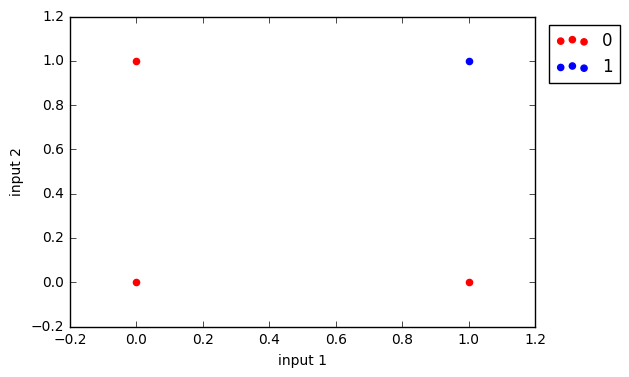

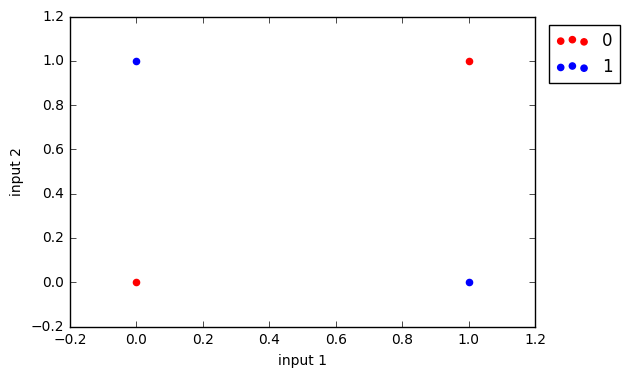

In [6]:
# if you do not have the csv data file call fetch_iris_data() by removing the comment in the line below
# fetch_iris_data()

X, Y = load_AND_data()
plot_data(X, Y)

X, Y = load_XOR_data()
plot_data(X, Y)

In [7]:
class Perceptron:

    def __init__(self, num):
        '''
        initialize class for `num` input signals
        '''

        # weights of the perceptron, initialized to zero
        # note the '1 + ' as the first weight entry is the threshold
        self.w_ = np.zeros(1 + num)

        return
    
    def activation_input(self, X):
        '''
        calculate the activation input of the neuron
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def classify(self, X):
        '''
        classify the data by sending the activation input through a step function
        '''
        return np.where(self.activation_input(X) >= 0.0, 1, -1)

    def learn(self, X_train, Y_train, eta=0.01, epochs=10):
        '''
        fit training features X_train with labels Y_train according to learning rate
        `eta` and total number of epochs `epochs` and log the misclassifications in errors_
        '''

        # reset internal list of misclassifications for the logging
        self.train_errors_ = [] 

        # repeat `epochs` many times
        for _ in range(epochs):
            err = 0
            # for each pair of features and corresponding label
            for x, y in zip(X_train, Y_train):
                # compute the update for the weight coefficients
                update = eta * ( y - self.classify(x) )
                # update the weights
                self.w_[1:] += update * x
                # update the threshold
                self.w_[0] += update
                # increment the number of misclassifications if update is not zero
                err += int(update != 0.0)
            # append the number of misclassifications to the internal list
            self.train_errors_.append(err)
    
        return

    def plot_decision_regions(self, X, Y, X_train, Y_train, resolution):

        # set up a 2d mesh of data points with resolution `resolution`
        x1_min, x1_max = X[:, 0].min() - 2, X[:, 0].max() + 2
        x2_min, x2_max = X[:, 1].min() - 2, X[:, 1].max() + 2

        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                               np.arange(x2_min, x2_max, resolution))

        # start new plot
        fig = plt.figure()
        axs = plt.gca()

        # make fictitious feature data out of the above 2d mesh
        x_mesh = np.array( [xx1.ravel(), xx2.ravel()] ).T
        # let the perceptron classify these features
        Z = self.classify(x_mesh)
        Z = Z.reshape(xx1.shape)

        # plot the mesh as contour plot
        axs.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
        axs.set_xlim(xx1.min(), xx1.max())
        axs.set_ylim(xx2.min(), xx2.max())
        
        # sort the input data according to the flower species
        X_setosa = []
        X_other = []
        for x, y in zip(X, Y):
            if y == -1:
                X_setosa.append(x)
            else:
                X_other.append(x)

        # turn the array into numpy arrays
        X_setosa = np.array(X_setosa)
        X_other = np.array(X_other)

        # and make a scatter plot with different styles for the two different species
        axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                    color='red', marker='.', label='0')
        axs.scatter(X_other[:, 0], X_other[:, 1], 
                    color='blue', marker='.', label='1')
        
        # sort the training data according to the flower species
        X_setosa = []
        X_other = []
        for x, y in zip(X_train, Y_train):
            if y == -1:
                X_setosa.append(x)
            else:
                X_other.append(x)

        # turn the array into numpy arrays
        X_setosa = np.array(X_setosa)
        X_other = np.array(X_other)
        
        # and make a scatter plot with different styles for the two different species
        axs.scatter(X_setosa[:, 0], X_setosa[:, 1], 
                    color='red', marker='x', label='0 training')
        axs.scatter(X_other[:, 0], X_other[:, 1], 
                    color='blue', marker='x', label='1 training')

        # add some additional annotations of the plot
        axs.set_xlabel('input 1')
        axs.set_ylabel('input 2')
        axs.legend(loc='upper right')
        axs.set_title('Perceptron')

        return

    def plot_train_errors(self):
        '''
        plot the number of misclassifications per epoch
        '''

        # create two list, one with epoch numbers, and one with the errors per epoch
        epochs, num_errs = np.arange(len(self.train_errors_)), np.array(self.train_errors_)

        # plot the above data
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('errors')
        axs.set_title('Errors during training')
        plt.plot(epochs, num_errs)

        return

    def efficiency(self, X_test, Y_test): 
        '''
        compute the efficiency = 1 - number of misclassifications / number of data points
        '''

        err = 0
        
        # classify the test data
        Z = self.classify(X_test)
        for z, y in zip(Z, Y_test):
            err += int(z != y)

        return 1 - float(err) / len(X_test)
    
class Adaline(Perceptron):

    def learn(self, X_train, Y_train, eta=0.01, epochs=1000):
        '''
        fit training data according to eta and n_iter
        and log the errors in errors_
        '''

        # we initialize two list, each for the misclassifications and the cost function
        self.train_errors_ = []
        self.train_loss_ = []

        # for all the epoch
        for _ in range(epochs):
            # classify the traning features
            Z = self.classify(X_train)
            # count the misqualifications for the logging
            err = 0
            for z, y in zip(Z, Y_train):
                err += int(z != y)
            # ans save them in the list for later use
            self.train_errors_.append(err)
            
            # compute the activation input of the entire traning features
            output = self.activation_input(X_train)
            # and then the deviation from the labels
            delta = Y_train - output
            # the following is an implmentation of the adaline update rule
            self.w_[1:] += eta * X_train.T.dot(delta)
            self.w_[0] += eta * delta.sum()
            # and finally, we record the loss function
            loss = (delta ** 2).sum() / 2.0
            # and save it for later use
            self.train_loss_.append(loss)

        return
    
    def plot_train_loss(self):
        '''
        plots the loss function value per epoch
        '''

        # create two lists, one enumerating the epochs, the other the cost values
        epochs, num_errs = np.arange(len(self.train_loss_)), np.array(self.train_loss_)

        # plot the loss per epoch
        fig = plt.figure()
        axs = plt.gca()
        axs.set_xlabel('epoch')
        axs.set_ylabel('cost')
        axs.set_title('Loss during training')
        plt.plot(epochs, num_errs)

        return

# AND Gate

Efficiency (test)  = 0.25
weight vector: [ 0.   0.5  0.5]


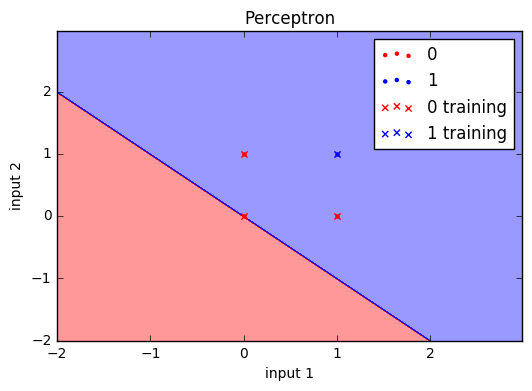

Efficiency (test)  = 1.0
weight vector: [-0.4   0.35  0.35]


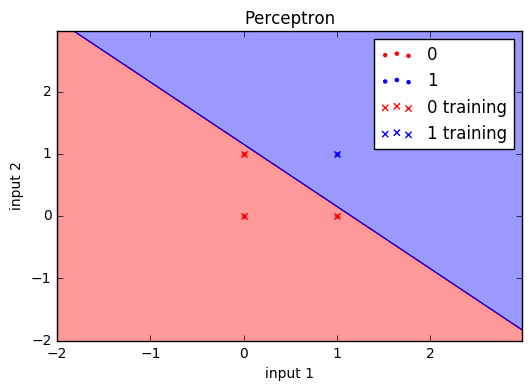

Efficiency (test)  = 1.0
weight vector: [-0.58   0.325  0.325]


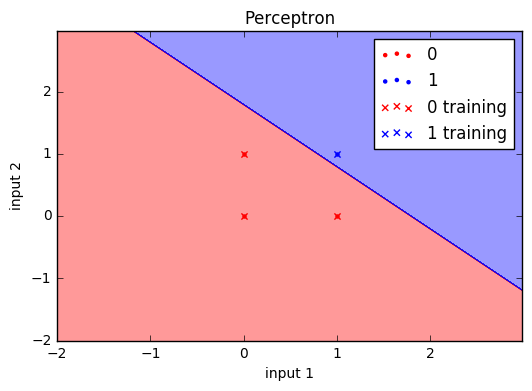

Efficiency (test)  = 1.0
weight vector: [-0.678   0.3435  0.3435]


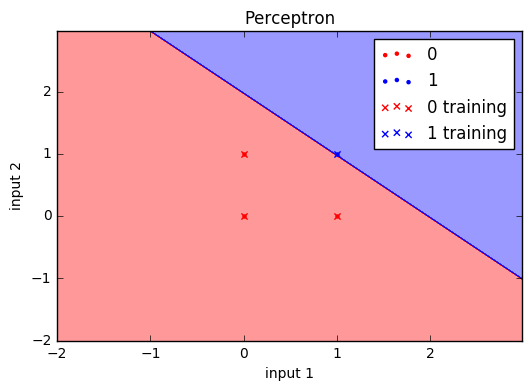

Efficiency (test)  = 1.0
weight vector: [-0.7442   0.37605  0.37605]


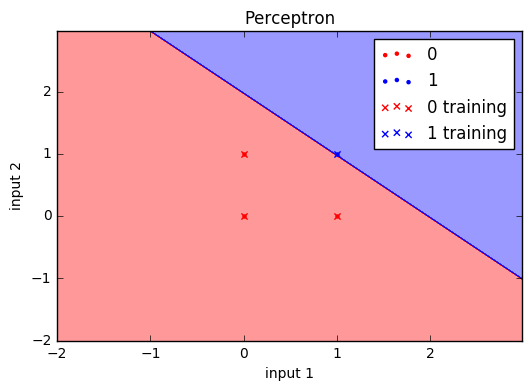

Efficiency (test)  = 1.0
weight vector: [-0.79694   0.412075  0.412075]


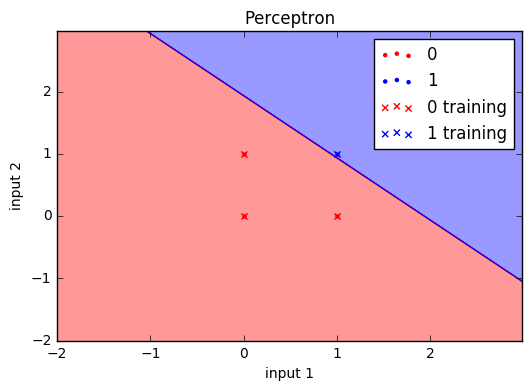

Efficiency (test)  = 1.0
weight vector: [-0.842994   0.4478405  0.4478405]


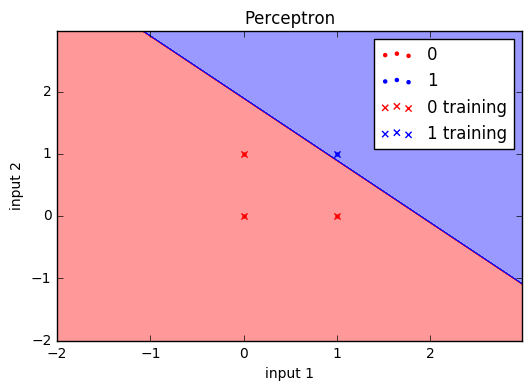

Efficiency (test)  = 1.0
weight vector: [-0.8849326   0.48208715  0.48208715]


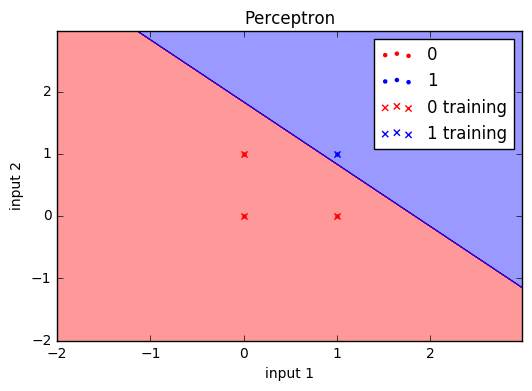

Efficiency (test)  = 1.0
weight vector: [-0.92379442  0.51444753  0.51444753]


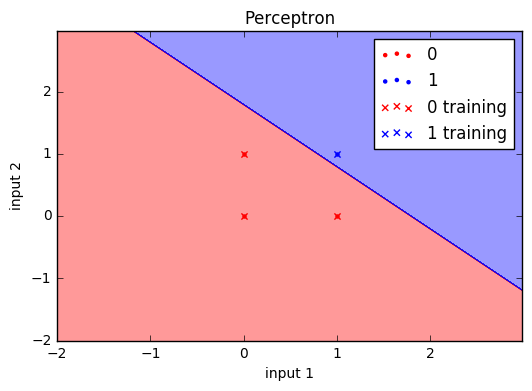

Efficiency (test)  = 1.0
weight vector: [-0.96005566  0.54487215  0.54487215]


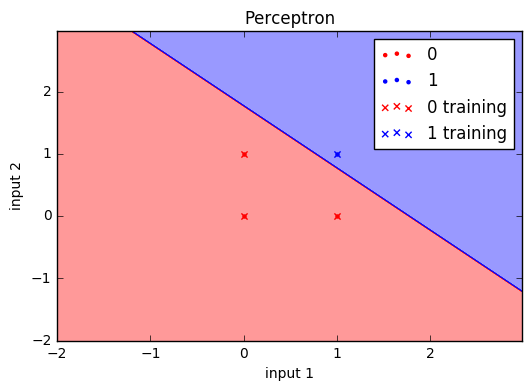

In [8]:
ada = Adaline(X.shape[1])

X, Y = load_AND_data()

ada.w_ = np.array([1, 1, 1], dtype=np.float64)

for _ in range(10):
    ada.learn(X, Y, eta=0.1, epochs=1)
    ada.plot_decision_regions(X, Y, X, Y, 0.02)
    eff_test = ada.efficiency(X, Y)
    print('Efficiency (test)  =', eff_test)
    print('weight vector:', ada.w_)
    plt.show()

# XOR Gate

Efficiency (test)  = 0.5
weight vector: [ 0.2  0.5  0.5]


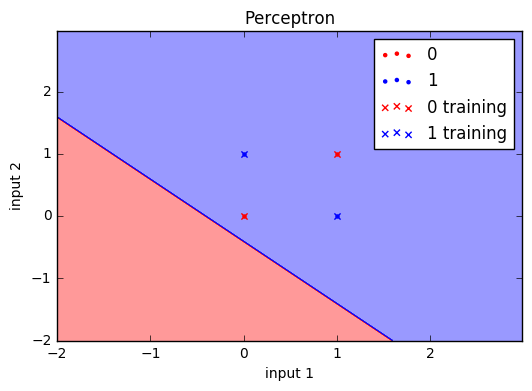

Efficiency (test)  = 0.75
weight vector: [-0.08  0.31  0.31]


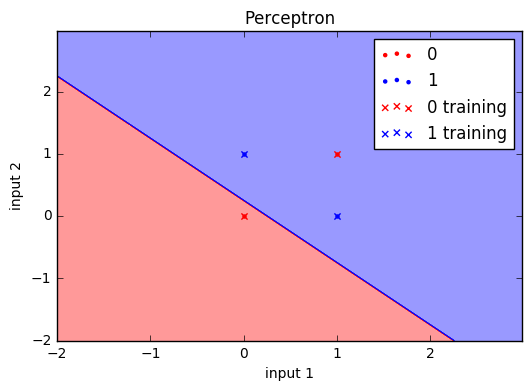

Efficiency (test)  = 0.75
weight vector: [-0.172  0.233  0.233]


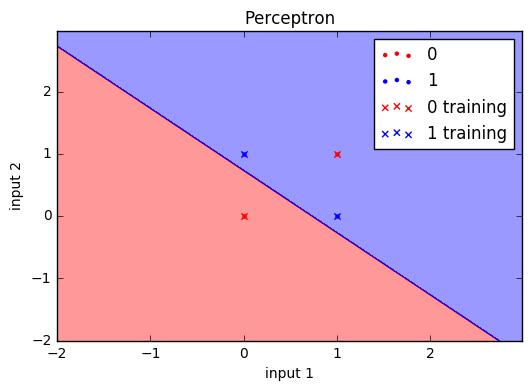

Efficiency (test)  = 0.75
weight vector: [-0.1964  0.1975  0.1975]


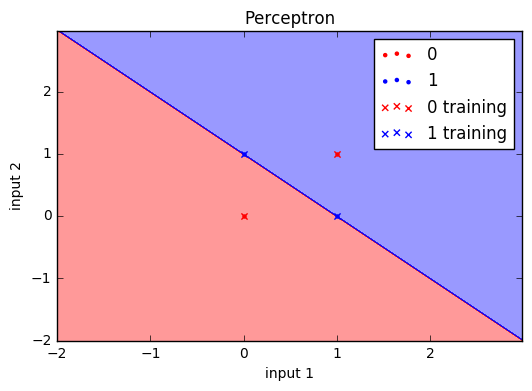

Efficiency (test)  = 0.25
weight vector: [-0.19684  0.17753  0.17753]


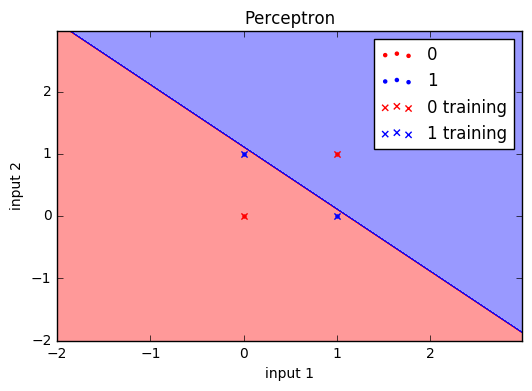

Efficiency (test)  = 0.25
weight vector: [-0.189116  0.163639  0.163639]


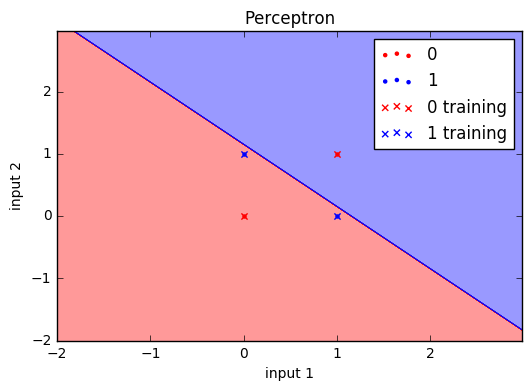

Efficiency (test)  = 0.25
weight vector: [-0.1789252  0.1523705  0.1523705]


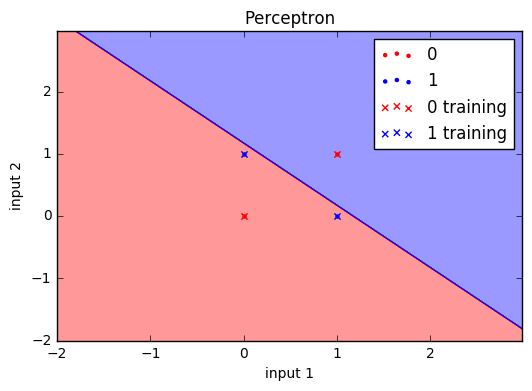

Efficiency (test)  = 0.25
weight vector: [-0.16830332  0.14244439  0.14244439]


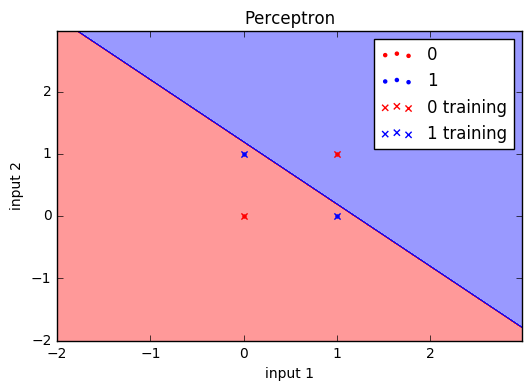

Efficiency (test)  = 0.25
weight vector: [-0.15795975  0.13337174  0.13337174]


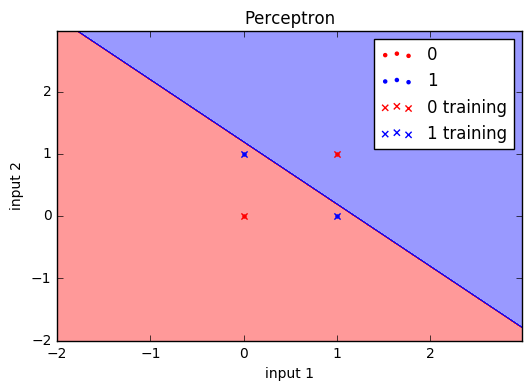

Efficiency (test)  = 0.25
weight vector: [-0.14812454  0.12495217  0.12495217]


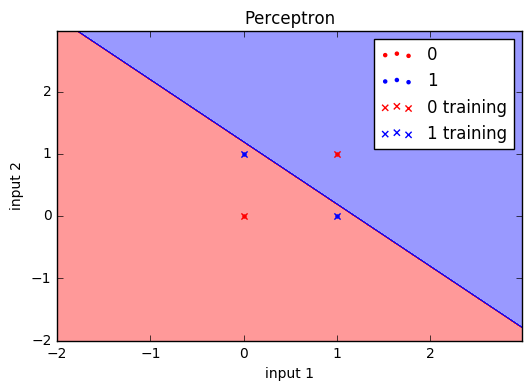

In [10]:
ada = Adaline(X.shape[1])

X, Y = load_XOR_data()

ada.w_ = np.array([1, 1, 1], dtype=np.float64)

for _ in range(10):
    ada.learn(X, Y, eta=0.1, epochs=1)
    ada.plot_decision_regions(X, Y, X, Y, 0.02)
    eff_test = ada.efficiency(X, Y)
    print('Efficiency (test)  =', eff_test)
    print('weight vector:', ada.w_)
    plt.show()